# Tarea 2

Primero que nada copiamos el csv en un dataframe.

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
df = pd.read_csv("winemag-data_first150k.csv",encoding='utf8')

Visualizo todos los datos. Por el tamaño solo se pueden ver los primeros y últimos 5.

In [2]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


Pasamos a ver los tipos de datos de cada una de las columnas.

In [3]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [4]:
df.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

Borramos las tablas que no necesiamos utilizar, en este caso suponemos que usaremos country, points y winery que es lo que nos importa

In [5]:
df = df.drop(['Unnamed: 0', 'country', 'description', 'designation', 'province', 'region_1', 'region_2'], axis=1)

In [6]:
df

,points,price,variety,winery
0,96,235.0,Cabernet Sauvignon,Heitz
1,96,110.0,Tinta de Toro,Bodega Carmen Rodríguez
2,96,90.0,Sauvignon Blanc,Macauley
3,96,65.0,Pinot Noir,Ponzi
4,95,66.0,Provence red blend,Domaine de la Bégude
...,...,...,...,...
150925,91,20.0,White Blend,Feudi di San Gregorio
150926,91,27.0,Champagne Blend,H.Germain
150927,91,20.0,White Blend,Terredora
150928,90,52.0,Champagne Blend,Gosset


Comprobamos ahora la existencia de datos nulos

In [7]:
df.isnull().sum()

points         0
price      13695
variety        0
winery         0
dtype: int64

Me interesa tener los datos en base a los puntos que recibe cada vino. Quiero ver su descripción.

In [8]:
df['points'].describe()

count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

Podemos observar la tendencia que sigue en torno a la calificación de los productos. Es interesante ver como los de 89 son muy bajos mientras la moda es de 87.
Para corroborar que la información es real, haremos un mode para ver la moda de estos.

<BarContainer object of 1 artists>

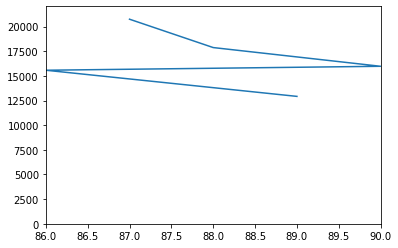

In [9]:
df['points'].value_counts().head().plot().bar(100, 21000)

In [10]:
df['points'].mode()

0    87
dtype: int64

Con esta gráfica podemos observar que puntos tiene cada vino con respecto a su precio. Las zonas más oscuras tienen precios muy grandes y los más tenues son los que tienen un precio más barato.

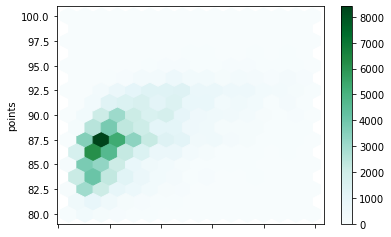

In [11]:
df[df['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

Como podemos observar aquí es un mismo histograma como con matplotlib pero en este histograma viene desglosado cada una de las calificaciones para tener un valor más exacto de cuales son en realidad el top 3 de puntos que se suelen dar.

In [12]:
import seaborn as sns

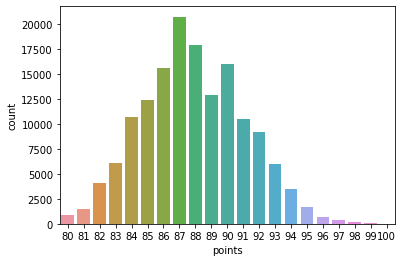

In [13]:
sns.countplot(df['points'])

Aquí podemos observar como Williams Selyem Tiene una mayor mediana con los puntos por encima de todas las otras vinerias pero de igual no son muchos los datos que se tienen como podría ser con Columbia que sí tiene una mayor cantidad de vinos pero de menor calidad, respecto a los puntos.

La barra negra gruesa en el centro representa el intervalo intercuartil, la barra negra fina que se extiende desde ella, representa el 95 % de los intervalos de confianza, y el punto blanco es la mediana.

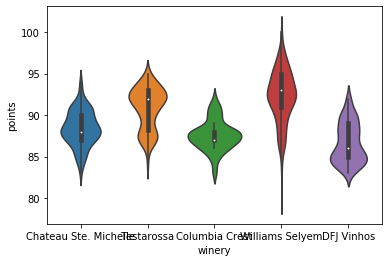

In [14]:
sns.violinplot(
    x='winery',
    y='points',
    data=df[df.winery.isin(df.winery.value_counts()[:5].index)]
)

Comenzamos con nuestra importación de la librería sys

In [16]:
import sys
!conda install --yes --prefix {sys.prefix} nltk

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Angel\Anaconda3

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         2.8 MB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                         conda-forge --> pkgs/main




conda-4.8.2          | 2.8 MB    |            |   0% 
conda-4.8.2          | 2.8 MB    |            |   1% 
conda-4.8.2          | 2.8 MB    | 2          |   2% 
conda-4.8.2          | 2.8 MB    | 7          |   7% 
conda-4.8.2          | 2.8 MB    | 9          |   9% 
conda-4.8.2          | 2.8 MB    | #4         |  15% 
conda-4.8.2          | 2.8 MB    | #

Pasamos a agregar las librerías correspondientes para poder realizar cada uno de los siguientes procesamientos.

In [17]:
import nltk
import ssl
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
print(stopwords.words("english")[:10])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer() # en inglés hasta podemos distinguir entre palabras positivas y negativas
print(s.polarity_scores('useless'))
print(s.polarity_scores('marvelous'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Angel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Angel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Angel\AppData\Roaming\nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}


In [19]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer